## Notebook to compare models in term of AUC on the trainval

In [ ]:
import ptitprince as pt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

import pickle
import os
import numpy as np
import pandas as pd

In [2]:
experiment_dir = ''
models = ['23-10-30_IPTR_baseline_nnunet',
'23-10-30_FOPF_dcop','23-10-30_LVHZ_dcp','23-10-30_KBLB_dco','23-10-30_MSBS_dcop_with_combat','23-10-30_THSG_cop','23-10-30_ZNZT_dop']
model_paths = {}
for model in models:
    model_paths[model[14:]] = os.path.join(experiment_dir,model,'s_0')

In [9]:

aucs = []
labels= [] 
n_epochs = []
for model in model_paths.keys():
    
    for fold in np.arange(5):
        fname = os.path.join(model_paths[model],f'fold_0{fold}','results_best_model','roc_auc.pickle')
        with open(fname, 'rb') as handle:
            b = pickle.load(handle)
        # optimal_threshold(b)
        
        aucs.append(b['auc_plus'])
        labels.append(model)
        vs=os.path.join(model_paths[model],f'fold_0{fold}','val_scores.csv')
        vs_df = pd.read_csv(vs)
        n_epochs.append(len(vs_df)-400)


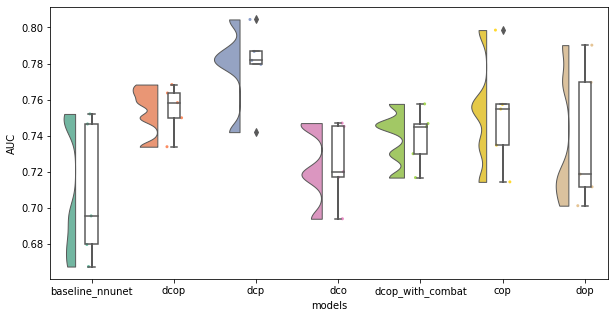

In [11]:
df = pd.DataFrame(np.vstack([aucs,n_epochs,labels]).T,columns=['AUC','n_epochs','models'],)

df['AUC'] = df['AUC'].astype(float)
df['n_epochs'] = df['n_epochs'].astype(float)

fig, ax = plt.subplots(1,1,figsize=(10,5))
pt.RainCloud(data=df, x='models',y='AUC',ax=ax)
ttests = np.zeros((len(model_paths.keys()),len(model_paths.keys())))
for m_i,model in enumerate(model_paths.keys()):
    for m2_i,model2 in enumerate(model_paths.keys()):
        ttests[m_i,m2_i] = st.ttest_rel(df['AUC'][df['models']==model],
        df['AUC'][df['models']==model2]
        )[0]

[[ 1.         -0.61414281]
 [-0.61414281  1.        ]]
[[1.        0.0096851]
 [0.0096851 1.       ]]
[[1.         0.51305337]
 [0.51305337 1.        ]]
[[1.        0.6717883]
 [0.6717883 1.       ]]
[[1.         0.83943415]
 [0.83943415 1.        ]]


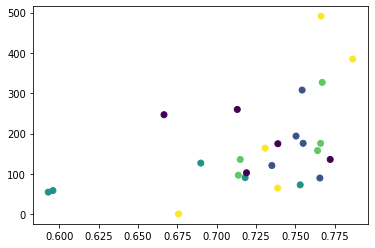

In [6]:
df=df[df['n_epochs']>0]
models = np.unique(df['models'])
c=[]
for m in df['models']:
    c_ind = np.where(models==m)[0]
    c.append(c_ind)
plt.scatter(df['AUC'],df['n_epochs'],c=c)
for model in models:
    model_mask = df['models']==model
    print(np.corrcoef(df['AUC'][model_mask],df['n_epochs'][model_mask]))

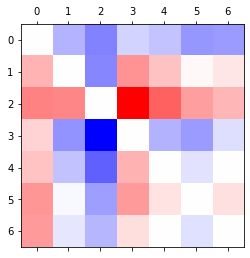

In [12]:
plt.matshow(np.nan_to_num(ttests),cmap='bwr')

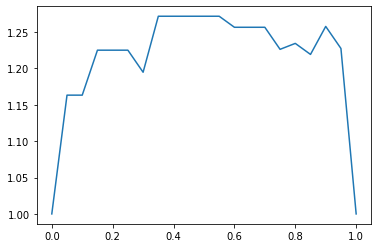

In [7]:
youden = b['sensitivity_plus']/max(b['sensitivity_plus'])+b['specificity']/max(b['specificity'])

plt.plot(b['thresholds'],youden)